# The isomorphism problem for ideal class monoids of numerical semigroups

We start by loading the package `numericalsgps`.

In [1]:
LoadPackage("num");

true

## Posets of gaps

## Example

The Hasse diagram of $(\mathbb{N}\setminus S,\le_S)$ with $S=\langle 6, 7, 8, 11\rangle$.

<Numerical semigroup with 4 generators>

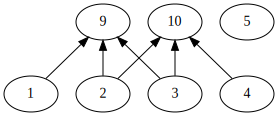

In [114]:
s:=NumericalSemigroup(6, 7, 8, 11);
JupyterSplashDot(DotBinaryRelation(HasseDiagramOfNumericalSemigroup(s,Gaps(s))));

### Example

The affine semigroups $\mathbb{N^2}\setminus\{(1,0),(0,1)\}$ and $\mathbb{N^2}\setminus\{(0,1),(0,2)\}$ have isomorphic posets of gaps (with respect to the order induced by the respective semigroups), but the first is minimally generated by seven elements, while the second is by six, and thus they cannot be isomorphic.

In [4]:
s:=AffineSemigroupByGaps([[1,0],[0,1]]);;
MinimalGenerators(s);

[ [ 0, 3 ], [ 1, 1 ], [ 0, 2 ], [ 3, 0 ], [ 2, 0 ], [ 2, 1 ], [ 1, 2 ] ]

In [6]:
t:=AffineSemigroupByGaps([[1,0],[2,0]]);;
MinimalGenerators(t);

[ [ 0, 1 ], [ 3, 0 ], [ 1, 1 ], [ 2, 1 ], [ 5, 0 ], [ 4, 0 ] ]

## Oversemigroups

## Example 

Oversemigroups of $\langle 3,5,7\rangle$ and $\langle 2,7\rangle$.

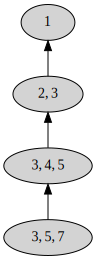

In [115]:
JupyterSplashDot(DotOverSemigroups(NumericalSemigroup(3,5,7)));

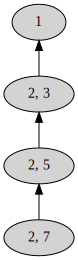

In [116]:
JupyterSplashDot(DotOverSemigroups(NumericalSemigroup(2,7)));

## Ideal class monoid

We will use the following functions to compute the set of normalized ideals of a numerical semigroup (which is isomorphic to the ideal class monoid of the semigroup).

In [7]:
# detects if a given list is the apery list of an ideal of s
isaperylistideal:=function(ap,s)
    local aps, m;
    if not(IsListOfIntegersNS(ap)) then
        return false;
    fi;

    if not(ForAll(ap, x->x>=0)) then    
        return false;
    fi;
    m:=Multiplicity(s);
    if Length(ap)<>m then
        return false;
    fi;

    aps:=AperyList(s);
    return ForAll(Cartesian([1..m],[1..m]), i-> ap[i[1]]+aps[i[2]] >= ap[1+(i[1]+i[2]-2) mod m]);
end;

function( ap, s ) ... end

In [8]:
# computes the set of normalized ideals of s
I0:=function(s)
    local k, c, v, m;
    m:=Multiplicity(s);
    k:=Concatenation([0],KunzCoordinates(s));
    c:=Cartesian(List([1..m],i->[0..k[i]]));
    c:=Filtered(c, k->isaperylistideal(List([1..m],i->k[i]*m+i-1),s));
    v:=List(c, k->List([1..m],i->k[i]*m+i-1)+s);
    return v;
end;

function( s ) ... end

In [9]:
# computes the set of irreducible normalized ideals of s
irredsI0:=function(s)
    local is, isnz;
    is:=I0(s);;
    isnz:=Difference(is,[0+s]);;
    return Filtered(isnz,i->Filtered(Cartesian(isnz,isnz), p->i<>p[1] and i<>p[2] and i=p[1]+p[2])=[]);
end;

function( s ) ... end

In [65]:
# dot of the hasse diagram of the set of normalized ideals of s
dotk:=function(s)
    local r, output, out, i,j, str, a2k,m,is,e,ec,hasse,rp,added,aps,kcs,g, le, l1,l2,nis, ln;

    str:=function(s)
        return Concatenation("\"",String(s),"\"");
    end;
    le:=function(a,b)
        return ForAll([1..Length(a)],i->a[i]<=b[i]);
    end;
    a2k:=function(a)
        return List([1..m-1],i->(a[i+1]-i)/m);
    end;
    hasse:=function(dom,rel)
        local out;
        
        out:=Filtered(rel, p-> p[1]=p[2] or ForAny(Difference(dom,p), x->([p[1],x] in rel) and ([x,p[2]] in rel)));
        
        return Difference(rel,out);
    end;

    m:=Multiplicity(s);
    g:=Genus(s);
    is:=I0(s);
    nis:=Length(is);
    aps:=List(is,AperyList);
    kcs:=List(aps,a2k);
    out:="";
    added:=[];
    output:=OutputTextString(out,true);
    AppendTo(output,Concatenation("graph ",str(JoinStringsWithSeparator(List(MinimalGenerators(s),String),"_")),"{"));
    AppendTo(output, str(Concatenation("〈",JoinStringsWithSeparator(List(MinimalGenerators(s),String),","),"〉"))," [shape=plaintext];\n");
    for i in [1..Length(is)] do
        #ln:=str(Concatenation(String(a2k(AperyList(is[i])))," ",String(MinimalGenerators(is[i]))));
        ln:=str(Concatenation("{",JoinStringsWithSeparator(MinimalGenerators(is[i]),","),"}"));
        AppendTo(output,i," [label=",ln);
        if is[i]+is[i]=is[i] then
            AppendTo(output,", style=filled];\n");
        else
            AppendTo(output,"];\n");
        fi;        
    od;
    ec:=[];
    for i in [0..g-1] do
        l1:=Filtered([1..nis],k->Sum(kcs[k])=i);
        l2:=Filtered([1..nis],k->Sum(kcs[k])=i+1);
        for j in l1 do
            Append(ec,List(Filtered(l2,k->le(kcs[j],kcs[k])),k->[j,k]));
        od;
    od;
    Print("Done computing hasse subset\n");
    e:=[];
    for i in [1..nis] do
        l1:=Filtered([1..nis],k->le(kcs[i],kcs[k]));
        l2:=Filtered(l1,k->ForAny(l1,j->is[j]+is[k]=is[i]));
        Append(e,List(l2,j->[i,j]));
    od;
    Print("Done computing prec\n");
    e:=hasse([1..nis],e);
    Print("Done computing hasse prec\n");
    e:=BinaryRelationByElements(Domain([1..Length(is)]),List(e,Tuple));
    for r in ec do
        AppendTo(output,r[1]," -- ",r[2]);
        if r[1] in PreImages(e,r[2]) then
            AppendTo(output,";\n");
        else
            AppendTo(output," [style=dashed];\n");
            #rp:=Filtered(e,p->p[1]=r[1] and p[2]<>p[1]);
            #Print("Missing: ",r[1]," ",r[2],"\n");
            rp:=ImagesElm(e,r[1]);
            for i in rp do
                if not([r[1],i] in Union(ec,added)) then
                    AppendTo(output,r[1]," -- ",i," [style=bold, constraint=false];\n");
                fi;
                Add(added,[r[1],i]);
            od;
        fi;
    od;
    AppendTo(output,"}");
    CloseStream(output);
    return out;
end;

function( s ) ... end

## Example

The Hasse diagrams of $(\mathfrak{I}_0(S),\preceq)$ of the semigroups of genus three.

In [106]:
sg3:=NumericalSemigroupsWithGenus(3);
List(sg3,MinimalGenerators);

[ <Numerical semigroup with 4 generators>,   <Numerical semigroup with 3 generators>,   <Numerical semigroup with 2 generators>,   <Numerical semigroup with 2 generators> ]

[ [ 4 .. 7 ], [ 3, 5, 7 ], [ 3, 4 ], [ 2, 7 ] ]

Done computing hasse subset
Done computing prec
Done computing hasse prec


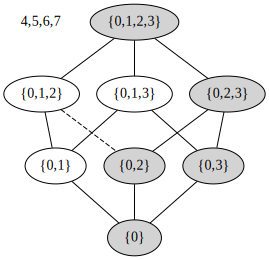

In [108]:
JupyterSplashDot(dotk(sg3[1]));

Done computing hasse subset
Done computing prec
Done computing hasse prec


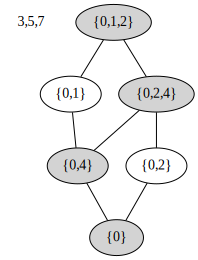

In [110]:
JupyterSplashDot(dotk(sg3[2]));

Done computing hasse subset
Done computing prec
Done computing hasse prec


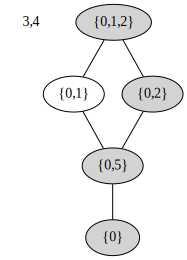

In [111]:
JupyterSplashDot(dotk(sg3[3]));

Done computing hasse subset
Done computing prec
Done computing hasse prec


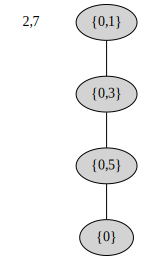

In [112]:
JupyterSplashDot(dotk(sg3[4]));

### Example

Let $S=\langle 4,6,9\rangle$. Let $I_1=\{0,7\}+S$ and $I_2=\{0,2,3,5\}+S$. Both $I_1$ and $I_2$ are idempotents, and thus they are over-semigroups of $S$; moreover, $I_1\subseteq I_2$. The monoid $({I_2}_\downarrow \cap C_{I_1},+)$ has eight elements, and its Hasse diagram with respect to $\preceq$ has height four.

In [71]:
s:=NumericalSemigroup(4,6,9);;
is:=I0(s);;
i1:=[0,7]+s;;
i2:=[0,2,3,5]+s;;
i1+i1=i1;
i2+i2=i2;

true

true

In [75]:
Ci1:=Filtered(is,i->i+i1=i);;
i2d:=Filtered(is,i->i+i2=i2);;
Ci1i2:=Intersection(Ci1,i2d);;
List(Ci1i2,MinimalGenerators);

[ [ 0, 2, 3, 5 ], [ 0, 2, 3 ], [ 0, 2, 5, 7 ], [ 0, 2, 7 ], [ 0, 3, 5 ],   [ 0, 3 ], [ 0, 5, 7 ], [ 0, 7 ] ]

Done computing hasse subset
Done computing prec
Done computing hasse prec


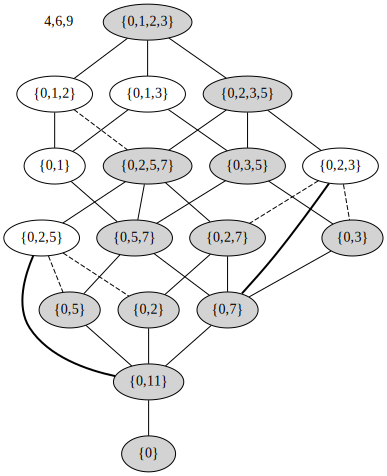

In [76]:
JupyterSplashDot(dotk(s));

If $({I_2}_\downarrow \cap C_{I_1},+)$ is isomorphic to $\mathfrak{I}_0(T)$ for some semigroup $T$, then the genus of $T$ should be three. Among the semigroups of genus three, the only one whose ideal class monoid has cardinality eight is $T=\langle 4,5,6,7\rangle$. 

In [79]:
nsI0s8:=Filtered(NumericalSemigroupsWithGenus(3),t->Length(I0(t))=8);
Length(nsI0s8);
MinimalGenerators(nsI0s8[1]);

[ <Numerical semigroup with 4 generators> ]

1

[ 4 .. 7 ]

However, $\mathfrak{I}_0(T)$ has only three irreducible elements while $({I_2}_\downarrow \cap C_{I_1},+)$ has four irreducible elements. 

In [81]:
t:=NumericalSemigroup(4,5,6,7);;
Length(irredsI0(t));

3

In [84]:
Ci1i2nz:=Difference(Ci1i2,[[0,7]+s]);;
irr:=Filtered(Ci1i2nz,i->Filtered(Cartesian(Ci1i2nz,Ci1i2nz),
              p->i<>p[1] and i<>p[2] and i=p[1]+p[2])=[]);;
List(irr,MinimalGenerators);

[ [ 0, 2, 3 ], [ 0, 2, 7 ], [ 0, 3 ], [ 0, 5, 7 ] ]

Thus, $({I_2}_\downarrow \cap C_{I_1},+)$ is not isomorphic to the ideal class monoid of a numerical semigroup.

### Example

Here is an example with $I$ $\preceq$-covering $J$ and $|I\setminus J|=3$. Take $S=\langle 5,9,17,21\rangle$, $I=\{0,3\}+S$ and $J=\{0,12\}+S$. 

Done computing hasse subset
Done computing prec
Done computing hasse prec


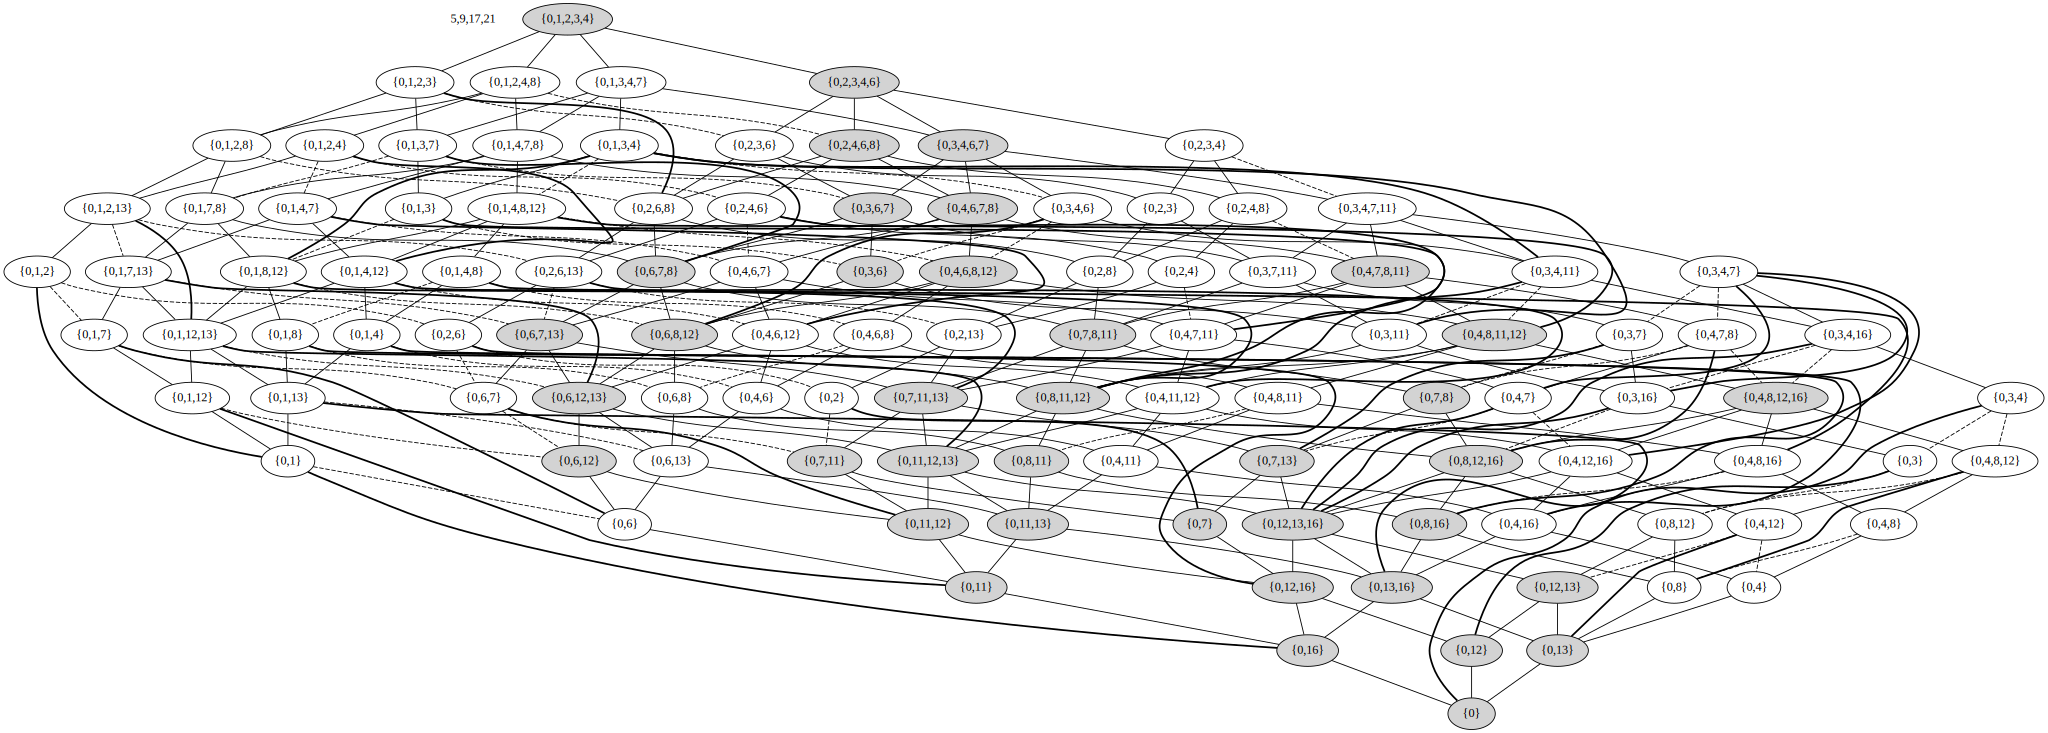

In [86]:
s:=NumericalSemigroup(5,9,17,21);;
JupyterSplashDot(dotk(s)); # this may take a while

In [100]:
i:=[0,3]+s;;
is:=I0(s);;
ci:=Filtered(is,j->IsSubset(i,j));;
pi:=Filtered(ci,j->ForAny(ci,k->k+j=i));;
List(pi,MinimalGenerators);

[ [ 0, 3 ], [ 0, 12 ], [ 0 ] ]

In [104]:
j:=[0,12]+s;;
i+i=i;
i+j=i;
Length(Difference(i,j));

false

true

3